# CH01 Compute descriptive statistics with Python 

## Introduction   
Through CH01 we will practice computing descriptive statistics to explore and summarize a dataset.

## Overview    
Earlier in the program, you learned about the process of EDA, from discovering to presenting your data. Whenever a data professional works with a new dataset, the first step is to understand the **context of the data** during the discovering stage. Often, this involves discussing the data with project stakeholders and reading documentation about the dataset and the data collection process. After all, the data professional moves on to data cleaning and addresses issues like missing data, incorrect values, and irrelevant data. Computing descriptive stats is a common step to take after data cleaning. 

## Import packages and libraries 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy import stats
import statsmodels.api as sm 
import seaborn as sns

In [2]:
education_districtwise = pd.read_csv("../datasets/education_districtwise.csv")

## Explore the data  

In [3]:
education_districtwise.head()

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
0,DISTRICT32,STATE1,13,391,104,875564.0,66.92
1,DISTRICT649,STATE1,18,678,144,1015503.0,66.93
2,DISTRICT229,STATE1,8,94,65,1269751.0,71.21
3,DISTRICT259,STATE1,13,523,104,735753.0,57.98
4,DISTRICT486,STATE1,8,359,64,570060.0,65.00


**Note：** To interpret this data correctly, It's important to understand that each row, or observation, refers to a different district(and not, for example, to a state or a village). So the `VILLAGES` column indicates how many villages are in each district, the `TOTPOPULAT` column indicates the population for each district, and the `OVERALL_LT` column indicates the literacy rate for each district.

### Use describe() to compute descriptive stats 

When computing descriptive stats in Python, the most useful function to know is `describe()`. Data professionals use the `describe()` function as a convenient way to calculate many key stats all at once. For a numeric column, `describe()` gives you the following output: 

*   `count`: Number of non-NA/null observations
*   `mean`: The arithmetic average
*   `std`: The standard deviation
*   `min`: The smallest (minimum) value
*   `25%`: The first quartile (25th percentile)
*   `50%`: The median (50th percentile) 
*   `75%`: The third quartile (75th percentile)
*   `max`: The largest (maximum) value


**Reference**: [pandas.DataFrame.describe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)

Our main interest is the literacy rate. This data is contained in the `OVERALL_LI` column, which shows the literacy rate for each district in the nation. Use the `describe()` function to reveal key stats about literacy rate. 

In [4]:
education_districtwise['OVERALL_LI'].describe()

count    634.000000
mean      73.395189
std       10.098460
min       37.220000
25%       66.437500
50%       73.490000
75%       80.815000
max       98.760000
Name: OVERALL_LI, dtype: float64

The summary of stats gives us valuable information about the overall literacy rate. For example, the mean helps to clarify the center of your dataset; we now know the average literacy rate is about 73% for all districts. This information is useful in itself and also as a basis for comparison. Knowing the mean literacy rate for *all* districts helps us understand which individual districts are significantly above or below the mean. 

**Note**: `describe()` excludes missing values (`NaN`) in the dataset from consideration. You may notice that the count, or the number of observations for `OVERALL_LI` (634), is fewer than the number of rows in the dataset (680). Dealing with missing values is a complex issue outside the scope of this course.

You can also use the `describe()` function for a column with categorical data, like the `STATNAME` column. 

For a **categorical column**, `describe()` gives you the following output: 

*   `count`: Number of non-NA/null observations
*  `unique`: Number of unique values
*   `top`: The most common value (the mode)
*   `freq`: The frequency of the most common value


In [5]:
education_districtwise['STATNAME'].describe()

count         680
unique         36
top       STATE21
freq           75
Name: STATNAME, dtype: object

The `unique` category indicates that there are 36 states in our dataset. The `top` category indicates that `STATE21` is the most commonly occurring value, or mode. The `frequency` category tells you that `STATE21` appears in 75 rows, which means it includes 75 different districts. 

This information may be helpful in determining which states will need more educational resources based on their number of districts. 

### Functions for stats  

The `describe()` function is also useful because it reveals a variety of key stats all at once. Python also has separate functions for the mean, median, standard deviation, minimum, and maximum. Earlier in the program, you used `mean()` and `median()` to detect outliers. These individual functions are also useful if you want to do further computations based on descriptive stats. For example, you can use the `min()` and `max()` functions together to compute the range of your data.

### Use max() and min() to compute range  


Recall that the **range** is the difference between the largest and smallest values in a dataset. In other words, range = max - min. You can use `max()` and `min()` to compute the range for the literacy rate of all districts in your dataset. 

In [6]:
range_overall_li = education_districtwise['OVERALL_LI'].max() - education_districtwise['OVERALL_LI'].min() 
range_overall_li

61.540000000000006

The range in literacy rates for all districts is about 61.5 percentage points. 

This large difference tells you that some districts have much higher literacy rates than others. Later on, you will continue to analyze this data, and you can discover which districts have the lowest literacy rates. This will help the government better understand literacy rates nationally and build on their successful educational programs. 

# CH02 Work with probability distributions in Python.

In [7]:
"Use dropna() to remove missing values in your data"
education_districtwise = education_districtwise.dropna()

### Plot a histogram  

The first step in trying to model your data with a probability ditribution is to plot a histogram. This will help you to visualize the shape of your data and determine if it resembles the shape of a specific distribution. 

<Axes: >

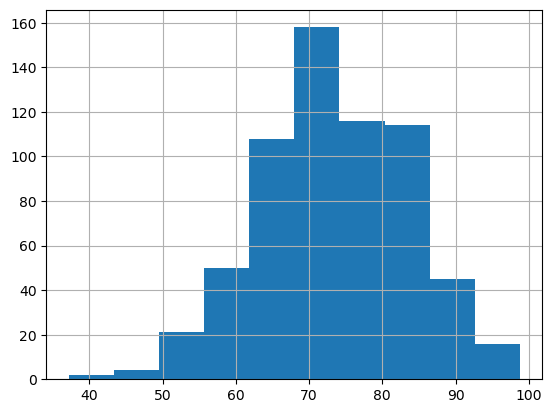

In [8]:
education_districtwise['OVERALL_LI'].hist()

**Note:** The histogram shows that the distribution of the literacy rate data is bell-shaped and symmetric about the mean. The mean literacy rate, which around 73%, is located in the center of the plot. **Normal distribution** is a continuous probability distribution that is bell-saped and symmetrical on both sides of the mean. The shape of the histogram suggests that the normal distribution might be a good modeling option for the data. 

### Empirical rule   

Since the normal distribution seems like a good fit for the district literacy rate data, we can expect the empirical rule to apply relatively well. Recall that the **empirical rule** says that for a normal distribution:  
* **68%** of the values fall within +/- 1 SD from the mean
* **95%** of the values fall within +/- 2 SD from the mean
* **99.7%** of the district literacy rates will fall within +/- 3 SD from the mean

**NOTE:** "SD" stands for standard deviation. 

In [9]:
mean_overall_li = education_districtwise['OVERALL_LI'].mean()
mean_overall_li

73.39518927444796

The mean district literacy rate is about 73.4%

In [10]:
std_overall_li = education_districtwise["OVERALL_LI"].std()
std_overall_li

10.098460413782469

The standard deviation is about 10%.

Now, let's compute the actual percentage of district literacy rates that fall within +/- 1 SD from the mean. 

To do this, we will first name two new variables: `lower_limit` and `upper_limit`. The lower limit will be one so SD below the mean, or the mean -(1 * SD). The upper limit will be one SD above the mean, or mean + (1 * SD). To write the code for the calculations, we will use our two previous variables, `mean_overall_li` and `std_overall_li`, for the mean and standard deviation. 

Then, we will add a new line of code that tells the comptuer to decide if each value in the `OVERALL_LI` column is between the lower limit and upper limit. To do this, we will use teh relational operators greater than or equal to (>=) and less than or equal to (<=), and the bitwise operator AND(&). Finally, we will use `mean()` to divide the number of values that are within 1 SD of the mean by the total number of values. 

In [11]:
lower_limit = mean_overall_li - 1 * std_overall_li 
upper_limit = mean_overall_li + 1 * std_overall_li 
((education_districtwise["OVERALL_LI"]>=lower_limit) & (education_districtwise['OVERALL_LI'] <= upper_limit)).mean()

0.6640378548895899

compute the actual percentage of distribute literacy rates that fall within +/- 2 SD from the mean.

In [12]:
lower_limit = mean_overall_li - 2 * std_overall_li
upper_limit = mean_overall_li + 2 * std_overall_li  
((education_districtwise["OVERALL_LI"] >= lower_limit) & (education_districtwise["OVERALL_LI"]<=upper_limit)).mean()

0.9542586750788643

Compute the actual percentage of district literacy rates that fall within +/- 3 SD from the mean. 

In [13]:
lower_limit = mean_overall_li - 3 * std_overall_li
upper_limit = mean_overall_li + 3 * std_overall_li 
((education_districtwise["OVERALL_LI"]>=lower_limit)& (education_districtwise['OVERALL_LI']<=upper_limit)).mean()

0.9968454258675079

Our values are quite well with the empirical rule! The value of 66.4%, 95.4% and 99.6% are very close to the values the empirical rule suggests: roughly 68%, 95% and 99.7%.  

**Notes:** Knowing that your data is normally distributed is useful for analysis because many statistical tests and machine learning models assume a normal distribution. When your data follows a normal distribution, you can use z-scores to measure the relative position of your values and find outliers in your data. 

### Compute z-scores to find outliers

 **z-score** is a measure of how many standard deviations below or above the population mean a data point is. A z-score is useful because it tells you **where** a value lies in a distribution. 

Data professionals often use z-scores for outlier detection. Typically, they consider observations with a z-score smaller than -3 or larger than +3 as outliers. In other words, these are values that lie more than +/- 3 SDs from the mean.  

To find outliers in the data, we will first create a new column called `Z_SCORE` that includes the z-scores for each district literacy rate in your dataset. Recall that the `OVERALL_LI` column lists all the district literacy rates.  

Then, we will compute the z-scores using the function `scipy.stats.zscore()`. 

**Reference**: [scipy.stats.zscore](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html)

In [14]:
education_districtwise["Z_SCORE"] = stats.zscore(education_districtwise['OVERALL_LI']) 
education_districtwise

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI,Z_SCORE
0,DISTRICT32,STATE1,13,391,104,875564.0,66.92,-0.641712
1,DISTRICT649,STATE1,18,678,144,1015503.0,66.93,-0.640721
2,DISTRICT229,STATE1,8,94,65,1269751.0,71.21,-0.216559
3,DISTRICT259,STATE1,13,523,104,735753.0,57.98,-1.527694
4,DISTRICT486,STATE1,8,359,64,570060.0,65.00,-0.831990
...,...,...,...,...,...,...,...,...
675,DISTRICT522,STATE29,37,876,137,5296396.0,78.05,0.461307
676,DISTRICT498,STATE29,64,1458,230,4042191.0,56.06,-1.717972
677,DISTRICT343,STATE29,59,1117,216,3483648.0,65.05,-0.827035
678,DISTRICT130,STATE29,51,993,211,3522644.0,66.16,-0.717030


Identify outliers or districts with z-scores that are more than +/- 3 SDs from the mean.

In [15]:
education_districtwise[(education_districtwise["Z_SCORE"]>3) | (education_districtwise['Z_SCORE']< -3)]

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI,Z_SCORE
434,DISTRICT461,STATE31,4,360,53,532791.0,42.67,-3.044964
494,DISTRICT429,STATE22,6,612,62,728677.0,37.22,-3.585076


Using z-scores, we can identify two outlying districts that have unusually low literacy rates: `DISTRICT461` and `DISTRICT429`. The literacy rates in these two districts are more than 3 SDs below the overall mean literacy rate.     
  
Our analysis gives us important information to share. The government may want to provide more funding and resources to these two districts in the hopes of significantly improving literacy. 


# CH03 Sampling with Python

The main content is learn to use Python to simulate random sampling and make a point estimate of population mean based on your sample data.

In [16]:
education_districtwise = pd.read_csv('../datasets/education_districtwise.csv') 
education_districtwise = education_districtwise.dropna()

We’ll continue with our previous scenario, in which you’re a data professional working for the Department of Education of a large nation. Recall that you’re analyzing data on the literacy rate for each district.

  
Now imagine that you are asked to *collect* the data on district literacy rates, and that you have limited time to do so. You can only survey 50 randomly chosen districts, instead of the 634 districts included in your original dataset. The goal of your research study is to estimate the mean literacy rate for *all* 634 districts based on your sample of 50 districts. 


## Simulate random sampling  
You can use Python to simulate taking a random sample of 50 districts from your datasets. To do this, use `pandas.DataFrame.sample()`. The following arguments in the `sample()` function will help you simulate random sampling:  

* `n`: Refers to the desired sample size
* `replace`: Indicates whether you are sampling with or without replacement
* `random_state`: Refers to the seed of the random number.

Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html.
**Note:** A **random seed** is a starting ponint for generating random numbers. You can use any arbitrary number to fix the random seed, and give the random number generator a starting point. Also, going forward, you can use the same random seed to generate the same set of numbers.

First, name a new variable `sampled_data`. Then, set the arguments for the `sample()` function:  

*   `n`: You're sampling from 50 districts, so your sample size is `50`. 
*   `replace`: For the purpose of our example, you'll sample *with* replacement. `True` indicates sampling with replacement. 
*   `random_state`: Choose an arbitrary number for your random seed. Say, `31208`. 

In [17]:
sampled_data = education_districtwise.sample(n = 50, replace=True, random_state = 31208) 
sampled_data

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
661,DISTRICT528,STATE6,9,112,89,1863174.0,92.14
216,DISTRICT291,STATE28,14,1188,165,3273127.0,52.49
367,DISTRICT66,STATE23,12,1169,116,1042304.0,62.14
254,DISTRICT458,STATE3,3,157,19,82839.0,76.33
286,DISTRICT636,STATE35,3,187,44,514683.0,86.70
369,DISTRICT512,STATE23,6,589,30,717169.0,68.35
258,DISTRICT156,STATE3,6,80,9,35289.0,59.94
10,DISTRICT412,STATE1,11,187,95,476820.0,68.69
512,DISTRICT277,STATE9,10,558,179,2298934.0,84.31
144,DISTRICT133,STATE21,14,1672,136,3673849.0,69.61


The output shows 50 districts selected randomly from your dataset. Each has a different literacy rate, but note that row 254 was sampled twice, which is possible because you sampled with replacement.

### Computer the sample mean 

Use the mean function to compute the sample mean. First, name a new variable `estimate1`. Next, use `mean()` to compute the mean for your sample data.

In [18]:
estimate1 = sampled_data["OVERALL_LI"].mean()
estimate1

74.22359999999999

The sample mean for district literacy rate is about 74.22%. This is a point estimate of the population mean based on your random sample of 50 districts. Remember that the population mean is the literacy rate for *all* districts. Due to sampling variability, the sample mean is usually not exactly the same as the population mean. 

Next, let’s find out what will happen if you compute the sample mean based on another random sample of 50 districts. 

To generate another random sample, name a new variable `estimate2`. Then, set the arguments for the sample function. Once again, `n` is `50` and `replace` is "True". This time, choose a different number for your random seed to generate a different sample: 56,810. Finally, add `mean()` at the end of your line of code to compute the sample mean. 

In [19]:
estimate2 = education_districtwise['OVERALL_LI'].sample(n = 50, replace = True, random_state = 56810).mean()
estimate2

74.2478

For the second estimate, the sample mean for district literacy rate is about 74.5%. 
Due to sampling variability, this sample mean is different from the sample mean of your previous estimate, 74.22% - but they're really close.

## The central limit theorem

Now, imagine you repeat the study 10,000 times and obtain 10,000 point estimates of the mean. In other words, you take 10,000 random samples of 50 districts, and compute the mean for each sample. According to the central limit theorem, **the mean of your sampling distribution will be roughly equal to the population mean**. 

You can use Python to compute the mean of the sampling distribution with 10,000 samples. 

Let’s go over the code step by step: 


1. Create an empty list to store the sample mean from each sample. Name this `estimate_list`.
2. Set up a for-loop with the `range() `function. The `range()` function generates a sequence of numbers from 1 to 10,000. The loop will run 10,000 times, and iterate over each number in the sequence.
3. Specify what you want to do in each iteration of the loop. The `sample()` function tells the computer to take a random sample of 50 districts with replacement–the argument `n` equals `50`, and the argument `replace` equals `True`. The `append() `function adds a single item to an existing list. In this case, it appends the value of the sample mean to each item in the list. Your code generates a list of 10,000 values, each of which is the sample mean from a random sample. 
4. Create a new data frame for your list of 10,000 estimates. Name a new variable `estimate_df` to store your data frame. 


In [20]:
def estimate_n(times = 100, n = 50, replace = True):
    estimate_list = [] 
    for i in range(times): 
        estimate_list.append(education_districtwise["OVERALL_LI"].sample(n = n, replace = replace).mean())
    estimate_df = pd.DataFrame(data = {"estimate":estimate_list})
    print(estimate_df['estimate'].mean())
estimate_n()

73.50290600000001


In [21]:
estimate_n(10000)

73.37810182000001


The mean of your sampling distribution is about 73.4%

Compare this with the population mean of your complete dataset

In [22]:
population_mean = education_districtwise["OVERALL_LI"].mean()
population_mean

73.39518927444796

The mean of the sampling distribution is essentially identical to the population mean ,which is also about 73.4%. 

### Visualize your data  

To visualize the relationship between your sampling distribution of 10 000 estimates and the normal distribution, we can plot both at the same time. 

In [23]:
estimate_list = [] 
for i in range(10000): 
    estimate_list.append(education_districtwise["OVERALL_LI"].sample(n = 50, replace = True).mean())
    estimate_df = pd.DataFrame(data = {"estimate":estimate_list})

In [24]:
mean_sample_means = estimate_df['estimate'].mean() 
mean_sample_means

73.4170675

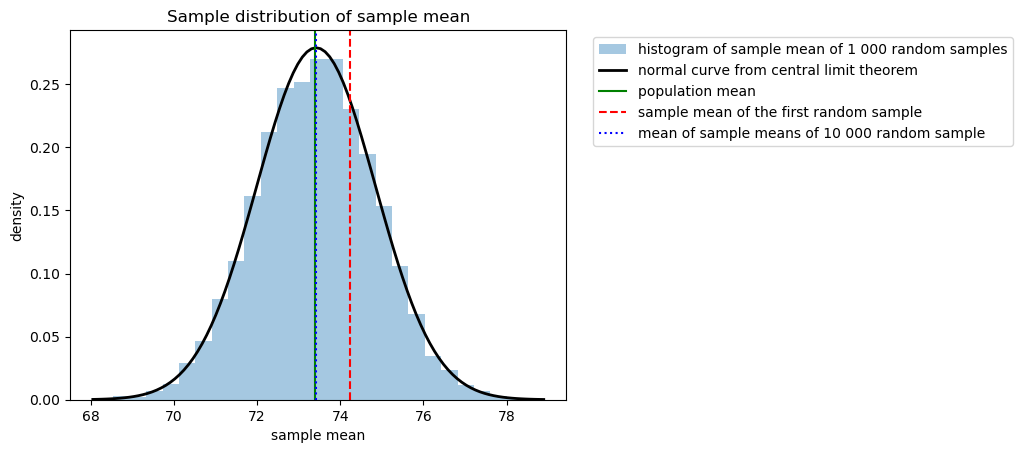

In [25]:
plt.hist(estimate_df['estimate'], bins = 25, density = True, alpha = 0.4, label = 'histogram of sample mean of 1 000 random samples') 
xmin, xmax = plt.xlim() 
x = np.linspace(xmin, xmax, 100) 
p = stats.norm.pdf(x, mean_sample_means, stats.tstd(estimate_df["estimate"]))
plt.plot(x, p, "k", linewidth = 2, label = 'normal curve from central limit theorem') 
plt.axvline(x = population_mean, color = 'g', linestyle = 'solid', label = 'population mean')
plt.axvline(x = estimate1, color = 'r', linestyle = '--', label = 'sample mean of the first random sample') 
plt.axvline(x = mean_sample_means, color ='b', linestyle =':', label = 'mean of sample means of 10 000 random sample')
plt.title('Sample distribution of sample mean') 
plt.xlabel('sample mean') 
plt.ylabel('density') 
plt.legend(bbox_to_anchor =(1.04, 1))
plt.show()

There are three key takeaways from this graph:

1.  As the central limit theorem predicts, the histogram of the sampling distribution is well approximated by the normal distribution. The outline of the histogram closely follows the normal curve.
2. The mean of the sampling distribution, the blue dotted line, overlaps with the population mean, the green solid line. This shows that the two means are essentially equal to each other.  
3. The sample mean of your first estimate of 50 districts, the red dashed line, is farther away from the center. This is due to sampling variability. 

The central limit theorem shows that as you increase the sample size, your estimate becomes more accurate. For a large enough sample, the sample mean closely follows a normal distribution. 

Your first sample of 50 districts estimated the mean district literacy rate as 74.22%, which is relatively close to the population mean of 73.4%. 

To ensure your estimate will be useful to the government, you can compare the nation’s literacy rate to other benchmarks, such as the global literacy rate, or the literacy rate of peer nations. If the nation’s literacy rate is below these benchmarks, this may help convince the government to devote more resources to improving literacy across the country. 

# Confidential intervals   

Throughout the following exercises, you will learn to use Python to construct a confidence interval for a point estimate.

In [26]:
education_districtwise = pd.read_csv("../datasets/education_districtwise.csv")
education_districtwise = education_districtwise.dropna()

In [27]:
sampled_data = education_districtwise.sample(n = 50, replace = True, random_state = 31200) 
sampled_data

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
42,DISTRICT125,STATE26,12,1044,143,3487882.0,82.54
493,DISTRICT545,STATE22,2,306,21,756993.0,65.28
561,DISTRICT211,STATE17,8,764,81,1660311.0,76.33
671,DISTRICT620,STATE29,36,822,129,2552073.0,62.25
675,DISTRICT522,STATE29,37,876,137,5296396.0,78.05
341,DISTRICT250,STATE33,2,506,61,481818.0,64.71
402,DISTRICT309,STATE24,12,913,140,1192948.0,79.41
147,DISTRICT335,STATE21,17,1945,138,4380793.0,69.44
509,DISTRICT511,STATE9,11,626,120,1513614.0,74.49
84,DISTRICT326,STATE25,5,256,45,956907.0,80.83


The output shows 50 districts selected randomly from your dataset. Each has a different literacy rate. 

## Construct a 95% confidence interval 
Construct a 95% confidence interval of the mean district literacy rate based on your sample data. Recall the four steps for constructing a confidence interval:  

1. Identify a sample statistic
2. Choose a confidence level
3. Find the margin of error
4. Calculate the interval 

### `scipy.stats.norm.interval()` 
  
Earlier, you worked through these steps one by one to construct a confidence interval. With Python, you can construct a confidence interval with just a single line of code–and get your results faster! 

If you’re working with a large sample size, say larger than 30, you can construct a confidence interval for the mean using `scipy.stats.norm.interval()`. This function includes the following arguments: 

*   `confidence`: The confidence level
*   `loc`: The sample mean
*   `scale`: The sample standard error

**Reference**: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html.

Let’s explore each argument in more detail. 

* `confidence`: The confidence level

The Department of Education requests a confidence level of 95%, which is the accepted standard for government funded research. 
* `loc`: The sample mean

This is the mean literacy rate of your sample of 50 districts. Name a new variable `sample_mean`. Then, compute the mean district literacy rate for your sample data.  
* `scale`: The sample standard error

Recall that **standard error** measures the variability of your sample data. You may remember that the formula for the sample standard error is the sample standard deviation divided by the square root of the sample size.

**Note**: In practice, we typically don't know the true standard error, so we replace it with the estimated standard error.

In [28]:
sample_mean = sampled_data['OVERALL_LI'].mean()

Write code to express the formula and have Python do the calculation for you: 

1. Name a new variable `estimated_standard_error`. 
2. Take the standard deviation of your sample data, and divide by the square root of your sample. 
3. In parentheses, write the name of your data frame followed by the shape function and zero in brackets. Recall that the shape function returns the number of rows and columns in a data frame. `shape[0]` returns only the number of rows, which is the same number as your sample size.  

In [29]:
estimated_standard_error = sampled_data['OVERALL_LI'].std()/np.sqrt(sampled_data.shape[0])

Now you’re ready to put all this together to construct your confidence interval for the mean using `scipy.stats.norm.interval()`. First, write out the function and set the arguments:

*   `alpha`: Enter `0.95` because you want to use a 95% confidence level
*   `loc`: Enter the variable `sample_mean`
*   `scale`: Enter the variable `estimated_standard_error`


In [30]:
stats.norm.interval(confidence = 0.95, loc=sample_mean, scale = estimated_standard_error)

(69.65490361548419, 75.43189638451582)

You have a 95% confidence interval for the mean district literacy rate that stretches from about 69.65% to 75.43%. 

95% CI: (69.65, 75.43)

## Construct a 99% confidence interval 

Now imagine that a senior director in the department wants to be even *more* confident about your results. The director wants to make sure you have a reliable estimate, and suggests that you recalculate your interval with a 99% confidence level.

To compute a 99% confidence interval based on the same sample data, just change `alpha` to `0.99`. 


In [31]:
stats.norm.interval(confidence=0.99, loc=sample_mean, scale=estimated_standard_error)

(68.74727227055253, 76.33952772944748)

### Relationship between confidence level and confidence interval

You may notice that as the confidence *level* gets higher, the confidence *interval* gets wider. 

* With a confidence level of 95%, the interval covers 5.6 percentage points (71.4% - 77.0%)
* With a confidence level of 99%, the interval covers 7.4 percentage points (70.5% - 77.9%)

This is because a wider confidence interval is more likely to include the actual population parameter.

# Use Python to conduct a hypothesis test   

stimulate taking a random sample of 20 districts in each state and conduct a two-sample t-test based on the sample data.

## Explore the data  

To start, filter your dataframe for the district literacy rate data from the states STATE21 and STATE28.  
* First name a new variable:`state21`
* Then, use the relational operator for equals (==) to get the relevant from the `STATNAME` column. 

In [32]:
state21 = education_districtwise[education_districtwise['STATNAME'] == "STATE21"]

Next, name another variable: `state28`. Follow the same procedure to get the relevant data from the `STATNAME` column.

In [33]:
state28 = education_districtwise[education_districtwise['STATNAME'] == 'STATE28']

## Simulate random sampling  

Now that you have organized your data, use the `sample()` function to take a random sample of 20 districts from each state. First, name a new variable: `sampled_state21`.Then, enter the arguments of the `sample()` function. 
* `n`: Your sample size is 20
* `replace`: Choose True because you are sampling with replacement
* `random_state`: Choose an arbitrary number for the random seed like 13490 

In [34]:
sampled_state21 = state21.sample(n = 20, replace = True, random_state = 13490)

Now, name another variable: `sampled_state28`. Follow the same procedure, but this time choose a different number for the random seed;

In [35]:
sampled_state28 = state28.sample(n = 20, replace = True, random_state = 39103)

## Compute the sample means  

use `mean()` to compute the mean district literacy rate for both STATE21 and STATE28. 

In [36]:
sampled_state21['OVERALL_LI'].mean() 

70.82900000000001

In [37]:
sampled_state28['OVERALL_LI'].mean()

64.60100000000001

STATE21 has a mean district literacy rate of about 70.8%, while STATE28 has a mean district literacy rate of about 64.6%. 

Based on your sample data, the observed difference between the mean district literacy rates of STATE21 and STATE28 is 6.2 percentage points (70.8% - 64.6%). 

**Note**: At this point, you might be tempted to conclude that STATE21 has a higher overall literacy rate than STATE28. However, due to sampling variability, this observed difference might simply be due to chance, rather than an actual difference in the corresponding population means. A hypothesis test can help you determine whether or not your results are statistically significant. 

### Conduct a hypothesis test  

Now that you’ve organized your data and simulated random sampling, you’re ready to conduct your hypothesis test. Recall that a two-sample t-test is the standard approach for comparing the means of two independent samples. To review, the steps for conducting a hypothesis test are:

1.   State the null hypothesis and the alternative hypothesis.
2.   Choose a significance level.
3.   Find the p-value. 
4.   Reject or fail to reject the null hypothesis.

#### Step 1: State the null hypothesis and the alternative hypothesis

The **null hypothesis** is a statement that is *assumed to be true unless there is convincing evidence to the contrary*. The **alternative hypothesis** is a statement that contradicts the null hypothesis and is accepted as true only if there is convincing evidence for it. 

In a two-sample t-test, the null hypothesis states that there is no difference between the means of your two groups. The alternative hypothesis states the contrary claim: there is a difference between the means of your two groups. 

We use $H_0$ to denote the null hypothesis and $H_A$ to denote the alternative hypothesis.

*   $H_0$: There is no difference in the mean district literacy rates between STATE21 and STATE28.
*   $H_A$: There is a difference in the mean district literacy rates between STATE21 and STATE28.

#### Step 2: Choose a significance level

The **significance level** is the threshold at which you will consider a result statistically significant. This is the probability of rejecting the null hypothesis when it is true. The Department of Education asks you to use their standard level of 5%, or 0.05.  

#### Step 3: Find the p-value

**P-value** refers to the probability of observing results as or more extreme than those observed when the null hypothesis is true.

Based on your sample data, the difference between the mean district literacy rates of STATE21 and STATE28 is 6.2 percentage points. Your null hypothesis claims that this difference is due to chance. Your p-value is the probability of observing an absolute difference in sample means that is 6.2 or greater *if* the null hypothesis is true. If the probability of this outcome is very unlikely—in particular, if your p-value is *less than* your significance level of 5%— then you will reject the null hypothesis.

#### `scipy.stats.ttest_ind()`

For a two-sample $t$-test, you can use `scipy.stats.ttest_ind()` to compute your p-value. This function includes the following arguments:

*   `a`: Observations from the first sample 
*   `b`: Observations from the second sample
*   `equal_var`: A boolean, or true/false statement, which indicates whether the population variance of the two samples is assumed to be equal. In our example, you don’t have access to data for the entire population, so you don’t want to assume anything about the variance. To avoid making a wrong assumption, set this argument to `False`. 

**Reference:** [scipy.stats.ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)

Now write your code and enter the relevant arguments: 

*   `a`: Your first sample refers to the district literacy rate data for STATE21, which is stored in the `OVERALL_LI` column of your variable `sampled_ state21`.
*   `b`: Your second sample refers to the district literacy rate data for STATE28, which is stored in the `OVERALL_LI` column of your variable `sampled_ state28`.
*   `equal_var`: Set to `False` because you don’t want to assume that the two samples have the same variance.

In [38]:
stats.ttest_ind(a = sampled_state21["OVERALL_LI"], b = sampled_state28["OVERALL_LI"], equal_var = False)

TtestResult(statistic=2.8980444277268735, pvalue=0.006421719142765237, df=35.20796133045557)

Your p-value is about 0.0064, or 0.64%. 

This means there is only a 0.64% probability that the absolute difference between the two mean district literacy rates would be 6.2 percentage points or greater if the null hypothesis were true. In other words, it’s highly unlikely that the difference in the two means is due to chance.

#### Step 4: Reject or fail to reject the null hypothesis

To draw a conclusion, compare your p-value with the significance level.

*   If the p-value is less than the significance level, you can conclude that there is a statistically significant difference in the mean district literacy rates between STATE21 and STATE28. In other words, you will reject the null hypothesis $H_0$.
*   If the p-value is greater than the significance level, you can conclude that there is *not* a statistically significant difference in the mean district literacy rates between STATE21 and STATE28. In other words, you will fail to reject the null hypothesis $H_0$.

Your p-value of 0.0064, or 0.64%, is less than the significance level of 0.05, or 5%. Therefore, you will *reject* the null hypothesis and conclude that there is a statistically significant difference between the mean district literacy rates of the two states: STATE21 and STATE28. 

# Explore descriptive statistics   

Data professionals often use descriptive statistics to understand the data they are working with and provide collaborators with a summary of the relative location of values in the data, as well an information about its spread. 

For this activity, you are a member of an analytics team for the United States Environmental Protection Agency (EPA). You are assigned to analyze data on air quality with respect to carbon monoxide, a major air pollutant. The data includes information from more than 200 sites, identified by state, county, city, and local site names. You will use Python functions to gather statistics about air quality, then share insights with stakeholders.

In [39]:
epa_data = pd.read_csv('../datasets/c4_epa_air_quality.csv', index_col = 0)

## Step 2: Data exploration 

To understand how the dataset is structured, display the first 10 rows of the data. 

In [40]:
epa_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,0.200000,2
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6


**Question:** What does the `aqi` column represent?

The `aqi` column represents the EPA's Air Quality Index (AQI).

In [41]:
# Get descriptive stats 
epa_data.describe()

,arithmetic_mean,aqi
count,260.000000,260.000000
mean,0.403169,6.757692
std,0.317902,7.061707
min,0.000000,0.000000
25%,0.200000,2.000000
50%,0.276315,5.000000
75%,0.516009,9.000000
max,1.921053,50.000000


**Question:** Based on the table of descriptive statistics, what do you notice about the count value for the `aqi` column?

The count value for the `aqi` column is 260. This means there are 260 aqi measurements represented in this dataset.   

**Question:** What do you notice about the 25th percentile for the `aqi` column?
This is an important measure for understanding where the aqi values lie. 

The 25th percentile for the `aqi` column is 2. This means that 25% of the aqi values in the data are below 2. 

**Question:** What do you notice about the 75th percentile for the `aqi` column?
This is another important measure for understanding where the aqi values lie. 

The 75th percentile for the aqi column is 9. This means that 75% of the aqi values in the data are below 9.

## Step 3:Statistical tests

In [42]:
# Get some descriptive statistics about the states in the data 
epa_data['state_name'].describe()

count            260
unique            52
top       California
freq              66
Name: state_name, dtype: object

**Question:** What do you notice while reviewing the descriptive statistics about the states in the data? 

Note: Sometimes you have to individually calculate statistics. To review to that approach, use the `numpy` library to calculate each of the main statistics in the preceding table for the `aqi` column.

There are 260 state values, and 52 of them are unique. California is the most commonly occurring state in the data, with a frequency of 66. (In other words, 66 entries in the data correspond to aqi measurements taken in California.)

## Step 4 Results and evaluation 

In [43]:
# Compute the mean value from the aqi column 
np.mean(epa_data['aqi'])

6.757692307692308

**Question:** What do you notice about the mean value from the `aqi` column?

This is an important measure, as it tells you what the **average** air quality is based on the data.

The mean value for the `aqi` column is approximately 6.76 (rounding to 2 decimal places here). This means that the average aqi from the data is approximately 6.76.

In [44]:
np.median(epa_data['aqi'])

5.0

**Question:** What do you notice about the median value from the `aqi` column?
This is an important measure for understanding the **central** location of the data.

The median value for the aqi column is 5.0. This means that half of the aqi values in the data are below 5.

In [45]:
# Identify the minimum value from the aqi column 
np.min(epa_data['aqi'])

0

Question: What do you notice about the minimum value from the aqi column?
This is an important measure, as it tell you the best air quality observed in the data.

The minimum value for the `aqi` column is 0. This means that the smallest aqi value in the data is 0.`

In [46]:
# Identify the maximum value from the aqi column 
np.max(epa_data['aqi'])

50

**Question:** What do you notice about the maximum value from the `aqi` column?
This is an important measure, as it tells you which value in the data corresponds to the worst air quality observed in the data.

The maximum value for the `aqi` column is 50. This means that the largest aqi value in the data is 50.

Now, compute the standard deviation for the `aqi` column.

By default, the `numpy` library uses 0 as the Delta Degrees of Freedom, while `pandas` library uses 1. To get the same value for standard deviation using either library, specify the `ddof` parameter to 1 when calculating standard deviation.

In [47]:
# Compute the standard deviation for the aqi column 
np.std(epa_data['aqi'], ddof = 1)

7.0617066788207215

**Question:** What do you notice about the standard deviation for the `aqi` column?   
This is an important measure of how spread out the aqi values are.


The standard deviation for the aqi column is approximately 7.05 (rounding to 2 decimal places here). This is a measure of **how spread out** the aqi values are in the data. 

## **Considerations**

**What are some key takeaways that you learned during this lab?**
Functions in the `pandas` and `numpy` libraries can be used to find statistics that describe a dataset. The `describe()` function from `pandas` generates a table of descriptive statistics about numerical or categorical columns. The `mean()`, `median()`, `min()`, `max()`, and `std()` functions from `numpy` are useful for finding individual statistics about numerical data.

**How would you present your findings from this lab to others? Consider the following relevant points noted by AirNow.gov as you respond:**
- "AQI values at or below 100 are generally thought of as satisfactory. When AQI values are above 100, air quality is considered to be unhealthy—at first for certain sensitive groups of people, then for everyone as AQI values increase."
- "An AQI of 100 for carbon monoxide corresponds to a level of 9.4 parts per million."

The average AQI value in the data is approximately 6.76, which is considered safe with respect to carbon monoxide. Further, 75% of the AQI values are below 9. 

**What summary would you provide to stakeholders? Use the same information provided previously from AirNow.gov as you respond.**

- 75% of the AQI values in the data are below 9, which is considered good air quality. 
- Funding should be allocated for further investigation of the less healthy regions in order to learn how to improve the conditions.


# Explore probability distributions   

The ability to determine which **type of probability distribution** best fits data, calculate z-score, and detect **outliers** are essential skills in data work. These capabilities enable data professionals to understand how their data is distributed and identify data points that need further examination.

In [48]:
# Load data into a DataFrame and save in a variable 
data = pd.read_csv("../datasets/modified_c4_epa_air_quality.csv")

## Step 2 Data exploration  


In [49]:
data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,2.708050
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,1.098612
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,1.098612
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,1.791759
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,1.945910


The `aqi_log` column represents AQI readings that were transformed logarithmically to suit the objectives of this lab. 

In [50]:
# Display number of rows, number of columns 
data.shape

(260, 8)

<Axes: >

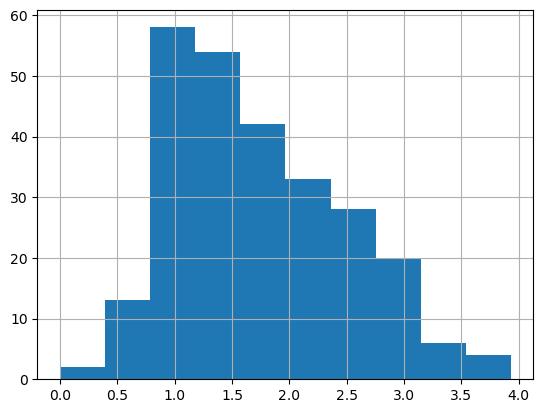

In [51]:
"Create a histogram to visualize distributino of aqi_log to find out whether aqi_log fits a specific type of probability distribution." 
data['aqi_log'].hist()

**Question:** What do you observe about the shape of the distribution from the histogram? 

There is a slight right skew, but it still appears to be a bell shape. This shape suggests that the distribution of this data should be approximately normal.

## Step 3 Statistical tests  

Use the empirical rule to observe the data, then test and verify that it is normally distributed.  
As you have learned, the empirical rule states that, for every normal distribution: 
- 68% of the data fall within 1 standard deviation of the mean
- 95% of the data fall within 2 standard deviations of the mean
- 99.7% of the data fall within 3 standard deviations of the mean

First, define two variables to store the mean and standard deviation, respectively, for `aqi_log`. Creating these variables will help you easily access these measures as you continue with the calculations involved in applying the empirical rule. 

In [52]:
# Define variable for aqi_log mean  
mean_aqi_log = data['aqi_log'].mean() 

# Print out the mean 
print(mean_aqi_log)

1.7669210929985582


In [53]:
# Define variable for aqi_log standard deviation 
std_aqi_log = data['aqi_log'].std()
print(std_aqi_log)

0.7147155520223721


Now, check the first part of the empirical rule: whether 68% of the `aqi_log` data falls within 1 standard deviation of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 1 standard deviation below the mean) and the upper limit (for example, 1 standard deviation above the mean). This will enable you to create a range and confirm whether each value falls within it.

In [54]:
lower_limit = mean_aqi_log - 1 * std_aqi_log 
upper_limit = mean_aqi_log + 1 * std_aqi_log

print(lower_limit, upper_limit)

1.052205540976186 2.4816366450209304


In [55]:
# Display the actual percentage of data that falls within 1 standard deviation of the mean 
((data['aqi_log'] >= lower_limit)&(data['aqi_log']<= upper_limit)).mean() * 100

76.15384615384615

Now, consider the second part of the empirical rule: whether 95% of the `aqi_log` data falls within 2 standard deviations of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 2 standard deviations below the mean) and the upper limit (for example, 2 standard deviations above the mean). This will enable you to create a range and confirm whether each value falls within it.

In [56]:
# Define variable for lower limit, 2 stand deviation below the mean 
lower_limit = mean_aqi_log - 2 * std_aqi_log 
# Define variable for upper limit, 2 stand deviations below the mean 
upper_limit = mean_aqi_log + 2 * std_aqi_log 
# Display lower_limit, uupper_limit
print(lower_limit, upper_limit)

0.3374899889538139 3.1963521970433026


In [57]:
# Display the actual percentage of data that falls within 2 standard deviations of the mean  
((data['aqi_log']>= lower_limit)&(data['aqi_log']<=upper_limit)).mean() * 100

95.76923076923077

Now, consider the third part of the empirical rule:whether 99.7% of the `aqi_log` data falls within 3 standard deviations of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 3 standard deviations below the mean) and the upper limit (for example, 3 standard deviations above the mean). This will enable you to create a range and confirm whether each value falls within it.

In [58]:
# Define variable for lower limit, 3 standard deviations below the mean.

lower_limit = mean_aqi_log - 3 * std_aqi_log


# Define variable for upper limit, 3 standard deviations above the mean.

upper_limit = mean_aqi_log + 3 * std_aqi_log


# Display lower_limit, upper_limit.

print(lower_limit, upper_limit)

-0.37722556306855815 3.9110677490656744


In [59]:
# Display the actual percentage of data that falls within 3 standard deviations of the mean.

((data["aqi_log"] >= lower_limit) & (data["aqi_log"] <= upper_limit)).mean() * 100

99.61538461538461

## **Step 4: Results and evaluation** 

**Question:** What results did you attain by applying the empirical rule? 
- About 76.15% of the data falls within 1 standard deviation of the mean.
- About 95.77% of the data falls within 2 standard deviation of the mean.
- About 99.62% of the data falls within 3 standard deviations of the mean.

The 95.77% is very close to 95%, and the 99.62% is very close to 99.7%. The 76.15% is not as close to 68%, but relatively close. Overall, from applying the empirical rule, the data appears to be not exactly normal, but could be considered approximately normal. 

**Question:** How would you use z-score to find outliers?

Since **z-score indicates the relative position of values** (for instance, z-score measures how many standard deviations below or above the mean a data point is), it can be used to detect outliers.

Z-score could be used to identify values that lie more than 3 standard deviations below or above the mean. These values may be considered outliers.

Compute the z-score for every `aqi_log` value. Then, add a column named `z_score` in the data to store those results. 

In [60]:
# Compute the z-score for every aqi_log value, and add a column named z_score in the data to store those results.
data['z_score'] = stats.zscore(data['aqi_log'], ddof = 1) # ddof = degrees of freedom correction(sample vs. population) 

# Display the first 5 rows to ensure that the new column was added 
data.head()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442,0.437265
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759,0.034753
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612,-0.935070
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294,-0.532557
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294,-0.532557


Identify the parts of the data where `aqi_log` is above or below 3 standard deviations of the mean.

In [61]:
# Display data where aqi_log is above or below 3 stand deviations of the mean 
data[(data['z_score']>3)|(data['z_score']< -3)]

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
244,2018-01-01,Arizona,Maricopa,Phoenix,WEST PHOENIX,Carbon monoxide,Parts per million,3.931826,3.029044


**Question:** What do you observe about potential outliers based on the calculations?

The `aqi_log` for West Phoenix is slightly above 3 standard deviations of the mean. This means that the air quality at that site is worse than the rest of the sites represented in the data.

**Question:** Why is outlier detection an important part of this project? 

Detecting outliers is important because they can reveal two important things, depending on the context: First, they can identify measurements that were taken incorrectly. Second, they can highlight parts of the data that can be focused on to make improvements. 

For example, if the `aqi_log` for West Phoenix is considered an outlier, then that site can be studied further to determine what practices or changes might improve the air quality.

# Explore sampling

In [62]:
epa_data = pd.read_csv("../datasets/c4_epa_air_quality.csv", index_col = 0)

## Data Exploration 

### Examine the data 
To understand how the dataset is structured, examine the first 10 rows of the data

In [63]:
# First 10 rows of the data 
epa_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,0.200000,2
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6


**Question:** What does the `aqi` column represent? 
* The `aqi` column represents the Air Quality Index.

### Generate a table of descriptive statistics  
Generate a table of some descriptive statistics about the data. Specify that all column of the input be included in the output. 

In [64]:
epa_data.describe(include = 'all')

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
count,260,260,260,260,257,260,260,260.000000,260.000000
unique,1,52,149,190,253,1,1,NaN,NaN
top,2018-01-01,California,Los Angeles,Not in a city,Kapolei,Carbon monoxide,Parts per million,NaN,NaN
freq,260,66,14,21,2,260,260,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.403169,6.757692
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.317902,7.061707
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276315,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.516009,9.000000


**Question:** Based on the preceding table of descriptive statistics, what is the mean value of the `aqi` column?  
- The value is `6.757692`. This value will be compared to the mean value after sampling with replacement later in the notebook.

**Question:** Based on the preceding table of descriptive statistics, what do you notice about the count value for the `aqi` column?

- The count value for the `aqi` column is 260. This means there are 260 AQI measurements represented in this dataset.

### Use the `mean()` function on the `aqi` column  
Use the `mean()` function on the `aqi` column and assign the values to a variable `population_mean`. The value should be the same as the one generated by the `describe()` method in the above table. 

In [65]:
population_mean = epa_data['aqi'].mean() 
population_mean

6.757692307692308

## Step 3: Statistical tests

### Sample with replacement  
First, name a new variable `sampled_data`. Then, use the `sample()` dataframe method to draw 50 samples from `epa_data`. Set `replace` equal to `True` to specify sampling with replacement. For `random_state`, choose an arbitrary number for random seed.

In [66]:
sampled_data = epa_data.sample(n = 50, replace = True, random_state = 42)

### Output the first 10 rows

In [67]:
sampled_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,0.157895,2
106,2018-01-01,California,Imperial,Calexico,Calexico-Ethel Street,Carbon monoxide,Parts per million,1.183333,26
71,2018-01-01,Alabama,Jefferson,Birmingham,Arkadelphia/Near Road,Carbon monoxide,Parts per million,0.200000,2
188,2018-01-01,Arizona,Maricopa,Tempe,Diablo,Carbon monoxide,Parts per million,0.542105,10
20,2018-01-01,Virginia,Roanoke,Vinton,East Vinton Elementary School,Carbon monoxide,Parts per million,0.100000,1
102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,0.157895,2
121,2018-01-01,North Carolina,Mecklenburg,Charlotte,Garinger High School,Carbon monoxide,Parts per million,0.200000,2
214,2018-01-01,Florida,Broward,Davie,Daniela Banu NCORE,Carbon monoxide,Parts per million,0.273684,5
87,2018-01-01,California,Humboldt,Eureka,Jacobs,Carbon monoxide,Parts per million,0.393750,5
99,2018-01-01,California,Santa Barbara,Goleta,Goleta,Carbon monoxide,Parts per million,0.222222,3


**Question:** In the DataFrame output, why is the row index 102 repeated twice? 

- Sampling with replacement is random, allowing sampling units to occur more than once. Row index 102 just happened to be sampled more than once. 

**Question:** What does `random_state` do?

- The parameter allows for the reproduction of the same exact sample (i.e., the same set of numbers). This means that the same rows in the dataset will be sampled with replacement each time the command is run. 

### Compute the mean value form the `aqi` column  

Compute the mean value from the `aqi` column in `sampled_data` and assign the value to the variable `sample_mean`.

In [68]:
sample_mean = sampled_data['aqi'].mean() 
sample_mean

5.54

 **Question:** Why is `sample_mean` different from `population_mean`?

- Due to sampling variability, the sample mean (`sample_mean`) is usually not the same as the population mean (`population_mean`). In this case, the sample mean is a point estimate of the population mean based on a random sample of 50 AQI values rather than the 260 AQI values from the original population in `epa_data`.  

### Apply the central limit theorem 

Imagine repeating the the earlier sample with replacement 10,000 times and obtaining 10,000 point estimates of the mean. In other words, imagine taking 10,000 random samples of 50 AQI values and computing the mean for each sample. According to the **central limit theorem**, the mean of a sampling distribution should be roughly equal to the population mean. Complete the following steps to compute the mean of the sampling distribution with 10,000 samples. 

* Create an empty list and assign it to a variable called `estimate_list`. 
* Iterate through a `for` loop 10,000 times. To do this, make sure to utilize the `range()` function to generate a sequence of numbers from 0 to 9,999. 
* In each iteration of the loop, use the `sample()` function to take a random sample (with replacement) of 50 AQI values from the population. Do not set `random_state` to a value.
* Use the list `append()` function to add the value of the sample `mean` to each item in the list.

In [69]:
estimate_list = [] 
for i in range(10000): 
    estimate_list.append(epa_data['aqi'].sample(n = 50, replace = True).mean())

### Create a new DataFrame 
Create a new DataFrame from the list of 10, 000 estimates. Name the new  variable `estimate_df`

In [70]:
estimate_df = pd.DataFrame(data = {"estimate": estimate_list}) 
estimate_df

,estimate
0,6.34
1,5.26
2,4.96
3,7.30
4,6.34
...,...
9995,6.78
9996,9.20
9997,6.04
9998,6.28


### Compute the mean() of the sampling distribution  

compute the `mean()` of the sampling distribution of 10 000 random samples and store the result in a new variable `mean_sample_means`

In [71]:
mean_sample_means = estimate_df['estimate'].mean() 
mean_sample_means

6.7577940000000005

**Question:** What is the mean for the sampling distribution of 10 000 random samples?  
This number will vary as `random_state` was not set to a value.

**Question:** How are the central limit theorem and random sampling (with replacement) related?

**Random sampling with replacement** is related to the central limit theorem because it means you are drawing observations independently from a population. **The central limit theorem** states that if a sample size is large enough and the observations are drawn independently—or with replacement—the sampling distribution of the sample mean is approximately the normal distribution. Furthermore, the mean parameter is the population mean and the variance parameter is the standard error. 

### Output the distribution using a histogram 
This provides an idea of the sampling distribtion

<Axes: >

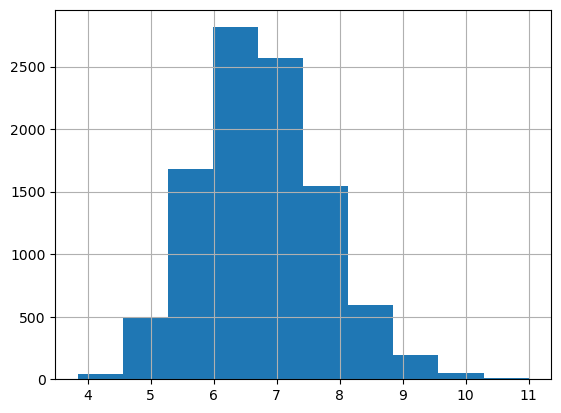

In [72]:
estimate_df['estimate'].hist()

### Calculate the standard error  
Calculate the stand error of the mean AQI using the initial sample of 50. The **stand error** of a statistic measures the sample-to-sample variable of the sample statistic. It provides a numerical measure of sampling variability and answers the question: How far is a statistic based on one particular sample from the actual value of the statistics?

In [73]:
standard_error = sampled_data['aqi'].std() / np.sqrt(len(sampled_data))  
standard_error

0.7413225908290327

## Step 4: Results and evaluation 


###  Visualize the relationship between the sampling and normal distributions

Visualize the relationship between your sampling distribution of 10,000 estimates and the normal distribution. The following code overlays the density curve of the normal distribution described in the theorem on top of the histogram of the sampling distribution obtained by repeated sampling. The solid magenta line in the graph is the population mean, the blue dotted line is the mean of the 10,000 sample means, and the red dashed line is the mean of the first random sample of 50.

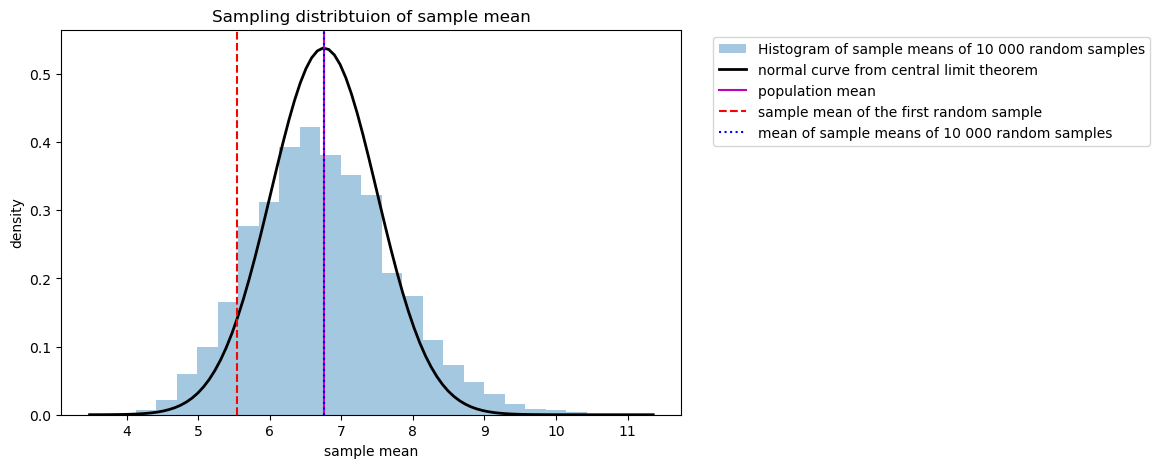

In [74]:
# Generate a grid of 100 values form xmin to xmax 

# set the figure size  
plt.figure(figsize = (8,5)) 

# plt the hist of sample means of 10 000 random samples 
plt.hist(estimate_df['estimate'], bins = 25, density = True, alpha = 0.4, label = 'Histogram of sample means of 10 000 random samples')  

# set xmin and xmax 
xmin, xmax = plt.xlim()  

# generate a grid of 100 values from xmin to xmax 
x = np.linspace(xmin, xmax, 100)  

# generate the pvalue  
p = stats.norm.pdf(x, population_mean, standard_error) 

# pl0t the normal curve from central limit theorem 
plt.plot(x, p, 'k', linewidth = 2, label = 'normal curve from central limit theorem') 

# plot the vertical line of population mean 
plt.axvline(x = population_mean, color = 'm', linestyle = 'solid', label = 'population mean') 

# plot the the vertical line of sample mean of the first random sample 
plt.axvline(x = sample_mean, color = 'r', linestyle = '--', label = 'sample mean of the first random sample') 

# plot the vertical line of mean of sample means of 10 000 random samples  
plt.axvline(x = mean_sample_means, color = 'b', linestyle = ':', label = 'mean of sample means of 10 000 random samples') 

# Plot the title  
plt.title("Sampling distribtuion of sample mean") 

# Plot the x-label 
plt.xlabel('sample mean') 

# Plot the y-label  
plt.ylabel('density') 

# plot the legend 
plt.legend(bbox_to_anchor =(1.04, 1))

**Question:** What insights did you gain from the preceding sampling distribution?

1.  The histogram of the sampling distribution is well-approximated by the normal distribution described by the central limit theorem.
2.  The estimate based on one particular sample (red dashed line) is off-center. This is expected due to sampling variability. The red dashed line would be in a different location if `epa_data.sample(n=50, replace=True, random_state=42)` had a different value for `random_state`.
3.  The population mean (green solid line) and the mean of the sample means (blue dotted line) overlap, meaning that they are essentially equal to each other.

# Explore confidence intervals   
Your manager has requested that you do the following for your analysis:
1. Provide a summary of the mean AQI for the states in which RRE operates.
2. Construct a boxplot visualization for AQI of these states using `seaborn`.
3. Evaluate which state(s) may be most affected by this policy, based on the data and your boxplot visualization.
4. Construct a confidence interval for the RRE state with the highest mean AQI.

In [75]:
aqi = pd.read_csv('../datasets/c4_epa_air_quality.csv')

## Step 2: Data exploration 

## Explore your dattaset   
Before proceeding to your deliverables, spend some time exploring the `aqi` DataFrame. 

In [76]:
# Explore the aqi DataFrame 
print("Use describe() to summarize AQI") 
print(aqi.describe(include = 'all'))

print("For a more thorough examination of observations by state use values_counts()") 
print(aqi['state_name'].value_counts())

Use describe() to summarize AQI
        Unnamed: 0  date_local  state_name  county_name      city_name  \
count   260.000000         260         260          260            260   
unique         NaN           1          52          149            190   
top            NaN  2018-01-01  California  Los Angeles  Not in a city   
freq           NaN         260          66           14             21   
mean    129.500000         NaN         NaN          NaN            NaN   
std      75.199734         NaN         NaN          NaN            NaN   
min       0.000000         NaN         NaN          NaN            NaN   
25%      64.750000         NaN         NaN          NaN            NaN   
50%     129.500000         NaN         NaN          NaN            NaN   
75%     194.250000         NaN         NaN          NaN            NaN   
max     259.000000         NaN         NaN          NaN            NaN   

       local_site_name   parameter_name   units_of_measure  arithmetic_mean  \


**Question:** What time range does this data cover?

All of the sites collected data on January 1st, 2018.

**Question:** What are the minimum and maximum AQI values observed in the dataset?

The minimum AQI value is 0 and the maximum AQI value is 50.

**Question:** Are all states equally represented in the dataset?

No, all states are not equally represented. California has 66 sites that reported AQI for this dataset, while states such as Delaware and Alabama have only one site that reported AQI. 

## Step 3: Statistical tests

### Summarize the mean AQI for RRE states  
Start with your first deliverable. Summarize the mean AQI for the states in which RRE operates.

In [77]:
# Summarize the mean AQI for RRE states 
rre_states = ['California', 'Florida','Michigan','Ohio','Pennsylvania','Texas']

# Subset aqi to only consider these states 
aqi_rre = aqi[aqi['state_name'].isin(rre_states)]

# Find the mean aqi for each of the RRE states 
aqi_rre.groupby(['state_name']).agg({'aqi':'mean','state_name':'count'})

,aqi,state_name
state_name,,
California,12.121212,66
Florida,5.500000,12
Michigan,8.111111,9
Ohio,3.333333,12
Pennsylvania,2.900000,10
Texas,2.700000,10


### Construct a boxplot visualization for the AQI of these states  
* Seaborn is a simple visualization library, commonly imported as 'sns'.
* Import `seaborn`.
* Then utilize a boxplot visualization from this library to compare the distribution of AQI scores by state. 

### Create an in-line visualization showing the distribution of `aqi` by `state_name`

<Axes: xlabel='state_name', ylabel='aqi'>

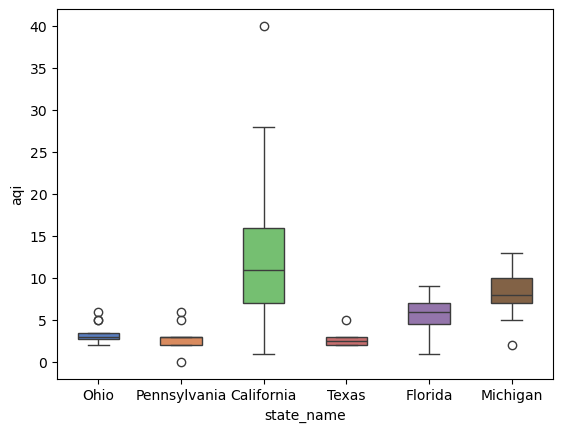

In [78]:
sns.boxplot(x = aqi_rre['state_name'], y = aqi_rre['aqi'],palette = 'muted',hue =aqi_rre['state_name'],legend = False,width = 0.5)

**Question:** Based on the data and your visualizations, which state(s) do you suspect will be most affected by this policy?  
* California: The mean and a signficant portion of the boxplot range over 10. 
* Michigan: While the mean is belwo 10, the boxplot ranges above 10.

### Construct a confidence interval for the RRE state with the highest mean AQI

Recall the four-step process for constructing a confidence interval:

1.   Identify a sample statistic.
2.   Choose a confidence level.
3.   Find the margin of error. 
4.   Calculate the interval.

### Construct your sample statistic

To contruct your sample statistic, find the mean AQI for your state.

In [79]:
# To construct your sample statistic, find the mean AQI for your state 
aqi_ca = aqi[aqi['state_name'] == 'California'] 
sample_mean = aqi_ca['aqi'].mean()  
sample_mean

12.121212121212121

### Choose your confidence level

Choose your confidence level for your analysis. The most typical confidence level chosen is 95%; however, you can choose 90% or 99% if you want decrease or increase (respectively) your level of confidence about your result.

In [80]:
confidence_level = 0.95 
confidence_level

0.95

### Find your margin of error (ME)

Recall **margin of error = z * standard error**, where z is the appropriate z-value for the given confidence level. To calculate your margin of error:

- Find your z-value. 
- Find the approximate z for common confidence levels.
- Calculate your **standard error** estimate. 

| Confidence Level | Z Score |
| --- | --- |
| 90% | 1.65 |
| 95% | 1.96 |
| 99% | 2.58 |


In [81]:
# Calculate your margin of error 
# Begin by identifying the z associated with your chosen confidence level 
z_value = 1.96

# Next, calculate your standard error 
standard_error = aqi_ca['aqi'].std() / np.sqrt(aqi_ca.shape[0])
print('stand error:{:.4f}\n'.format(standard_error))


# lastlu, use the preceding result to calculate your margin of error 
margin_of_error = standard_error * z_value  
print("margin of error:{:.4f}".format(margin_of_error))


stand error:0.8987

margin of error:1.7615


### Calculate your interval

Calculate both a lower and upper limit surrounding your sample mean to create your interval.

In [82]:
# Calculate your confidence interval (upper and lower limits) 
upper_ci_limit = sample_mean + margin_of_error 
lower_ci_limit = sample_mean - margin_of_error 
(lower_ci_limit, upper_ci_limit)

(10.359719031551148, 13.882705210873095)

### Alternative: Construct the interval using `scipy.stats.norm.interval()`

`scipy` presents a simpler solution to developing a confidence interval. To use this, first import the `stats` module from `scipy`.

## Step 4: Results and evaluation

### Recalculate your confidence interval

Provide your chosen `confidence_level`, `sample_mean`, and `standard_error` to `stats.norm.interval()` and recalculate your confidence interval.

In [83]:
stats.norm.interval(confidence=confidence_level, loc = sample_mean, scale= standard_error)

(10.359751399400034, 13.882672843024208)

# Considerations

**What are key takeaways from this lab?**

* Based on the mean AQI for RRE states, California and Michigan were most likely to have experienced a mean AQI above 10.
* With California experiencing the highest sample mean AQI in the data, it appears to be the state most likely to be affected by the policy change. 
* Constructing a confidence interval allowed you to estimate the sample mean AQI with a certain degree of confidence.

**What findings would you share with others?**

* Present this notebook to convey the analytical process and describe the methodology behind constructing the confidence interval. 
* Convey that a confidence interval at the 95% level of confidence from this sample data yielded `[10.36 , 13.88]`, which provides the interpretation "given the observed sample AQI measurements, there is a 95% confidence that the population mean AQI for California was between 10.36 and 13.88. This range is notably greater than 10."
* Share how varying the confidence level changes the interval. For example, if you varied the confidence level to 99%, the confidence interval would become `[9.80 , 14.43]`. 


**What would you convey to external stakeholders?**

* Explain statistical significance at a high level. 
* Describe California's observed mean AQI and suggest focusing on that state.
* Share the result of the 95% confidence interval, describing what this means relative to the threshold of 10.
* Convey any potential shortcomings of this analysis, such as the short time period being referenced. 

# Explore hypothesis testing 

ROA is considering the following decisions. For each, construct a hypothesis test and an accompanying visualization, using your results of that test to make a recommendation:

1. ROA is considering a metropolitan-focused approach. Within California, they want to know if the mean AQI in Los Angeles County is statistically different from the rest of California.
2. With limited resources, ROA has to choose between New York and Ohio for their next regional office. Does New York have a lower AQI than Ohio?
3. A new policy will affect those states with a mean AQI of 10 or greater. Would Michigan be affected by this new policy?

**Notes:**
1. For your analysis, you'll default to a 5% level of significance.
2. Throughout the lab, for two-sample t-tests, use Welch's t-test (i.e., setting the `equal_var` parameter to `False` in `scipy.stats.ttest_ind()`). This will account for the possibly unequal variances between the two groups in the comparison.

## Step 2: Data Exploration

### Before proceeding to your deliverables, explore your datasets.

Use the following space to surface descriptive statistics about your data. In particular, explore whether you believe the research questions you were given are readily answerable with this data.

In [84]:
# Explore your dataframe aqi here  
print("Use head() to show a sample of data") 
print(aqi.head()) 

print("Use describe() to summarize AQI ") 
print(aqi.describe(include = 'all')) 

print("For a more thorough examinatino of observation by state use values_counts()")
print(aqi['state_name'].value_counts())
print("For a more")

Use head() to show a sample of data
   Unnamed: 0  date_local    state_name   county_name      city_name  \
0           0  2018-01-01       Arizona      Maricopa        Buckeye   
1           1  2018-01-01          Ohio       Belmont      Shadyside   
2           2  2018-01-01       Wyoming         Teton  Not in a city   
3           3  2018-01-01  Pennsylvania  Philadelphia   Philadelphia   
4           4  2018-01-01          Iowa          Polk     Des Moines   

                                     local_site_name   parameter_name  \
0                                            BUCKEYE  Carbon monoxide   
1                                          Shadyside  Carbon monoxide   
2  Yellowstone National Park - Old Faithful Snow ...  Carbon monoxide   
3                             North East Waste (NEW)  Carbon monoxide   
4                                          CARPENTER  Carbon monoxide   

    units_of_measure  arithmetic_mean  aqi  
0  Parts per million         0.473684    7  
1 

#### **Question 1: From preceding data exploration, what do you recognize?**

- You have county-level data for the first hypothesis.
- Ohio and New York both have a higher number of observations to work with in this dataset.

## Step 3. Statistical Tests

Before you proceed, recall the following steps for conducting hypothesis testing:

1. Formulate the null hypothesis and the alternative hypothesis.<br>
2. Set the significance level.<br>
3. Determine the appropriate test procedure.<br>
4. Compute the p-value.<br>
5. Draw your conclusion.

### Hypothesis 1
 
ROA is considering a metropolitan-focused approach. Within California, they want to know if the mean AQI in Los Angeles County is statistically different from the rest of California.

Before proceeding with your analysis, it will be helpful to subset the data for your comparison.

In [85]:
# Create dataframe for each sample being comapred in your test 
ca_la = aqi[aqi['county_name'] == 'Los Angeles'] 
ca_other = aqi[(aqi['state_name'] == 'California') & (aqi['county_name'] != 'Los Angeles')]

#### Formulate your hypothesis

Formulate your null and alternative hypotheses:

*   $H_0$: There is no difference in the mean AQI between Los Angeles County and the rest of California.
*   $H_A$: There is a difference in the mean AQI between Los Angeles County and the rest of California.


#### Set the significance level 


In [86]:
# For this analysis, the significance level is 5% 
significance_level = 0.05 
significance_level

0.05

#### Determine the appropriate test procedure: 
Here, you are comparing the sample means between two independent samples. Therefore, you will utilize a **two-sample  𝑡-test**.

#### Compute the p-value

In [87]:
stats.ttest_ind(a = ca_la['aqi'], b = ca_other['aqi'], equal_var=False)

TtestResult(statistic=2.1107010796372014, pvalue=0.049839056842410995, df=17.08246830361151)

In `ttest_ind()`, a is the aqi column from the "Los Angeles" dataframe, and b is the aqi column from the "Other California" dataframe. Be sure to set `equal_var` = False.`

#### **Question 2. What is your p-value for hypothesis 1, and what does this indicate for your null hypothesis?**

With a p-value (0.049) being less than 0.05 (as your significance level is 5%), reject the null hypothesis in favor of the alternative hypothesis.

Therefore, a metropolitan strategy may make sense in this case.

### Hypothesis 2 

With limited resources, ROA has to choose between New York and Ohio for their next regional office. Does New York have a lower AQI than Ohio?

Before proceeding with your analysis, it will be helpful to subset the data for your comparison.

In [88]:
ny = aqi[aqi['state_name'] == 'New York'] 
ohio = aqi[aqi['state_name'] == 'Ohio']

#### **Question 1: From preceding data exploration, what do you recognize?**

- You have county-level data for the first hypothesis.
- Ohio and New York both have a higher number of observations to work with in this dataset.

#### Formulate your hypothesis: 
**Formulate your null and alternative hypotheses:**

*   $H_0$: The mean AQI of New York is greater than or equal to that of Ohio.
*   $H_A$: The mean AQI of New York is **below** that of Ohio.

#### Significance Level (remains at 5%)

#### Determine the appropriate test procedure:

Here, you are comparing the sample means between two independent samples in one direction. Therefore, you will utilize a **two-sample  𝑡-test**.

#### Compute the p-value

In [89]:
tstat, pvalue = stats.ttest_ind(a = ny['aqi'], b = ohio['aqi'], alternative='less', equal_var = False) 
print(tstat)
print(pvalue)

-2.025951038880333
0.03044650269193468


#### **Question 3. What is your p-value for hypothesis 2, and what does this indicate for your null hypothesis?**

With a p-value (0.030) of less than 0.05 (as your significance level is 5%) and a t-statistic < 0 (-2.036), **reject the null hypothesis in favor of the alternative hypothesis**.

Therefore, you can conclude at the 5% significance level that New York has a lower mean AQI than Ohio.

###  Hypothesis 3: A new policy will affect those states with a mean AQI of 10 or greater. Will Michigan be affected by this new policy?

Before proceeding with your analysis, it will be helpful to subset the data for your comparison.

In [90]:
michigan = aqi[aqi['state_name'] == 'Michigan']

#### Formulate your hypothesis:
**Formulate your null and alternative hypotheses here:**

*   $H_0$: The mean AQI of Michigan is less than or equal to 10.
*   $H_A$: The mean AQI of Michigan is greater than 10.


#### Significance Level (remains at 5%) 

#### Determine the appropriate test procedure: 
Here, you are comparing one sample mean relative to a particular value in one direction. Therefore, you will utilize a **one-sample  𝑡-test**.

#### Compute the P-value

In [91]:
tstat, pvalue = stats.ttest_1samp(michigan['aqi'], 10, alternative = 'greater') 
print(tstat)
print(pvalue)

-1.7395913343286131
0.9399405193140109


#### **Question 4. What is your p-value for hypothesis 3, and what does this indicate for your null hypothesis?**

With a p-value (0.940) being greater than 0.05 (as your significance level is 5%) and a t-statistic < 0 (-1.74), **fail to reject the null hypothesis**.

Therefore, you cannot conclude at the 5% significance level that Michigan's mean AQI is greater than 10. This implies that Michigan would most likely not be affected by the new policy.

## Step 4. Results and Evaluation

Now that you've completed your statistical tests, you can consider your hypotheses and the results you gathered.  

#### **Question 5. Did your results show that the AQI in Los Angeles County was statistically different from the rest of California?**

Yes, the results indicated that the AQI in Los Angeles County was in fact different from the rest of California.

#### **Question 6. Did New York or Ohio have a lower AQI?**

Using a 5% significance level, you can conclude that New York has a lower AQI than Ohio based on the results.

#### **Question 7: Will Michigan be affected by the new policy impacting states with a mean AQI of 10 or greater?**

Based on the tests, you would fail to reject the null hypothesis, meaning you can't conclude that the mean AQI is greater than 10. Thus, it is unlikely that Michigan would be affected by the new policy.


# Conclusion

**What are key takeaways from this lab?**

Even with small sample sizes, the variation within the data is enough to allow you to make statistically significant conclusions. You identified at the 5% significance level that the Los Angeles mean AQI was stastitically different from the rest of California, and that New York does have a lower mean AQI than Ohio. However, you were unable to conclude at the 5% significance level that Michigan's mean AQI was greater than 10.

**What would you consider presenting to your manager as part of your findings?**

For each test, you would present the null and alternative hypothesis, then describe your conclusion and the resulting p-value that drove that conclusion. As the setup of t-test's have a few key configurations that dictate how you interpret the result, you would specify the type of test you chose, whether that tail was one-tail or two-tailed, and how you performed the t-test from `stats`.


**What would you convey to external stakeholders?**

In answer to the research questions posed, you would convey the level of significance (5%) and your conclusion. Additionally, providing the sample statistics being compared in each case will likely provide important context for stakeholders to quickly understand the difference between your results.

# Automatidata Project

In this activity, you will practice using statistics to analyze and interpret data. The activity covers fundamental concepts such as **descriptive statistics** and **hypothesis testing**. You will explore the data provided and conduct A/B and hypothesis testing.  
<br/>   

**The purpose** of this project is to demostrate knowledge of how to prepare, create, and analyze A/B tests. Your A/B test results should aim to find ways to generate more revenue for taxi cab drivers.

**Note:** For the purpose of this exercise, assume that the sample data comes from an experiment in which customers are randomly selected and divided into two groups: 1) customers who are required to pay with credit card, 2) customers who are required to pay with cash. Without this assumption, we cannot draw causal conclusions about how payment method affects fare amount.

**The goal** is to apply descriptive statistics and hypothesis testing in Python.**The goal** for this A/B test is to sample data and analyze whether there is a relationship between payment type and fare amount. For example: discover if customers who use credit cards pay higher fare amounts than customers who use cash.
  
*This activity has four parts:*

**Part 1:** Imports and data loading
* What data packages will be necessary for hypothesis testing?

**Part 2:** Conduct EDA and hypothesis testing
* How did computing descriptive statistics help you analyze your data? 

* How did you formulate your null hypothesis and alternative hypothesis? 

**Part 3:** Communicate insights with stakeholders

* What key business insight(s) emerged from your A/B test?

* What business recommendations do you propose based on your results?


## **Conduct an A/B test** 

<img src =  "../PACE/Pace.png" width = "100" height="100" align = left>   
  
## PACE 
Stage Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src =  "../PACE/Plan.png" width = "100" height="100" align = left>   
  
## Plan   

In this stage, consider the following questions where applicable to complete your code response:
1. What is your research question for this data project?  
  Later on, you will need to formulate the null and alternative hypotheses as the first step of your hypothesis test. Consider your research question now, at the start of this task.

In [99]:
taxi_data = pd.read_csv("../datasets/2017_Yellow_Taxi_Trip_Data.csv", index_col=0)

**Hint:**  
Main functions: `stats.ttest_ind(a, b ,equal_var)`  
Other functions: mean()   
Packages: `pandas`, `stats.scipy`

<img src="../PACE/Analyze.png" width="100" height="100" align=left>

<img src="../PACE/Construct.png" width="100" height="100" align=left>

## PACE: **Analyze and Construct**
In this stage, consider the following questions where applicable to complete your code response:
1. Data professionals use descriptive statistics for Exploratory Data Analysis. How can computing descriptive statistics help you learn more about your data in this stage of your analysis?    
In general, descriptive statistics are useful because they let you quickly explore and understand large amounts of data. In this case, computing descriptive statistics helps you quickly compare the average total fare amount among different payment types.

### Data Exploration

In [100]:
taxi_data.describe(include='all')

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
unique,NaN,22687,22688,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,07/03/2017 3:45:19 PM,10/18/2017 8:07:45 PM,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,2,NaN,NaN,NaN,22600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.556236,NaN,NaN,1.642319,2.913313,1.043394,NaN,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,0.496838,NaN,NaN,1.285231,3.653171,0.708391,NaN,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,1.000000,NaN,NaN,1.000000,0.990000,1.000000,NaN,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,2.000000,NaN,NaN,1.000000,1.610000,1.000000,NaN,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,2.000000,NaN,NaN,2.000000,3.060000,1.000000,NaN,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000


You are interested in the relationship between payment type and the fare amount the customer pays. One approach is to look at the average fare amount for each payment type. 

In [101]:
taxi_data.groupby("payment_type")['fare_amount'].mean()

payment_type
1    13.429748
2    12.213546
3    12.186116
4     9.913043
Name: fare_amount, dtype: float64

Based on the averages shown, it appears that customers who pay in credit card tend to pay a larger fare amount than customers who pay in cash. However, this difference might arise from random sampling, rather than being a true difference in fare amount. To assess whether the difference is statistically significant, you conduct a hypothesis test.

### Hypothesis testing

Before you conduct your hypothesis test, consider the following questions where applicable to complete your code response:

1. Recall the difference between the null hypothesis and the alternative hypotheses. What are your hypotheses for this data project?
  
**Hypothesis:**
There is <font color = red>no difference</font> in average fare between customers who use credit cards and customers who use cash.

**Alternative hypothesis**: There is <font color = red>a difference</font> in average fare between customers who use credit cards and customers who use cash

Your goal in this step is to conduct a two-sample t-test. Recall the steps for conducting a hypothesis test: 


1.   State the null hypothesis and the alternative hypothesis
2.   Choose a signficance level
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis

**Note:** For the purpose of this exercise, your hypothesis test is the main component of your A/B test. 

$H_0$: There is no difference in the average fare amount between customers who use credit cards and customers who use cash.

$H_A$: There is a difference in the average fare amount between customers who use credit cards and customers who use cash.

You choose 5% as the significance level and proceed with a two-sample t-test.

In [105]:
credit_card = taxi_data[taxi_data['payment_type'] == 1]['fare_amount'] 
cash = taxi_data[taxi_data['payment_type'] == 2]['fare_amount'] 
stats.ttest_ind(credit_card, cash, equal_var=False)

TtestResult(statistic=6.866800855655372, pvalue=6.797387473030518e-12, df=16675.48547403633)

Since the p-value is significantly smaller than the significance level of 5%, you reject the null hypothesis. So  there is a statistically significant difference in the average fare amount between customers who use credit cards and customers who use cash.

<img src="../PACE/Execute.png" width="100" height="100" align=left>

## PACE:Execute

### Task 4. Communicate insights with stakeholders 
1. What business insight(s) can you draw from the result of your hypothesis test?    
The key business insight is that encouraging customers to pay with credit cards can generate more revenue for taxi cab drivers.   
2. Consider why this A/B test project might not be realistic, and what assumptions had to be made for this educational project.  
This project requires an assumption that passengers were forced to pay one way or the other, and that once informed of this requirement, they always complied with it. The data was not collected this way; so, an assumption had to be made to randomly group data entries to perform an A/B test. This dataset does not account for other likely explanations. For example, riders might not carry lots of cash, so it's easier to pay for longer/farther trips with a credit card. In other words, it's far more likely that fare amount determines payment type, rather than vice versa. 

# TikTok Prject 

## Data Exploration and Hypothesis Testing 

<img src="../PACE/Pace.png" width="100" height="100" align=left>  
  
## PACE Stages  


  
Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="../PACE/Pace.png" width="100" height="100" align=left>  
  
### PACE
  
Consider the questions in your PACE Strategy Document and those below to craft your response.

1. What is your research question for this data project? Later on, you will need to formulate the null and alternative hypotheses as the first step of your hypothesis test. Consider your research question now, at the start of this task.

There are a few possible ways to frame the research question. For example:

1) Do videos from verified accounts and videos unverified accounts have different average view counts?

2) Is there a relationship between the account being verified and the associated videos' view counts?

In [110]:
data = pd.read_csv("../datasets/tiktok_dataset.csv")

<img src="../PACE/Analyze.png" width="100" height="100" align=left>

<img src="../PACE/Construct.png" width="100" height="100" align=left> 

### Analyze and Construct

1. Data professionals use descriptive statistics for Exploratory Data Analysis. How can computing descriptive statistics help you learn more about your data in this stage of your analysis?

In general, descriptive statistics are useful because they let you quickly explore and understand large amounts of data. In this case, computing descriptive statistics helps you quickly compute the mean values of video_view_count for each group of verified_status in the sample data.

### Data exploration

In [111]:
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [112]:
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [113]:
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [115]:
data = data.dropna(axis = 0)

In [116]:
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


You are interested in the relationship between `verified_status` and `video_view_count`. One approach is to examine the mean values of `video_view_count` for each group of `verified_status` in the sample data.

In [117]:
data.groupby('verified_status')['video_view_count'].mean()

verified_status
not verified    265663.785339
verified         91439.164167
Name: video_view_count, dtype: float64

### Hypothesis testing

Before you conduct your hypothesis test, consider the following questions where applicable to complete your code response:

1. Recall the difference between the null hypothesis and the alternative hypotheses. What are your hypotheses for this data project?  

*   **Null hypothesis**: There is no difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (any observed difference in the sample data is due to chance or sampling variability).
*    **Alternative hypothesis**: There is a difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (any observed difference in the sample data is due to an actual difference in the corresponding population means).

Your goal in this step is to conduct a two-sample t-test. Recall the steps for conducting a hypothesis test:


1.   State the null hypothesis and the alternative hypothesis
2.   Choose a signficance level
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis


**$H_0$**: There is no difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (any observed difference in the sample data is due to chance or sampling variability).

**$H_A$**: There is a difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (any observed difference in the sample data is due to an actual difference in the corresponding population means).   
You choose 5% as the significance level and proceed with a two-sample t-test.

In [118]:
not_verified = data[data['verified_status'] == 'not verified']['video_view_count'] 
verified = data[data['verified_status'] == 'verified']['video_view_count']

In [120]:
stats.ttest_ind(not_verified, verified, equal_var=False)

TtestResult(statistic=25.499441780633777, pvalue=2.6088823687177823e-120, df=1571.163074387424)

Since the p-value is extremely small (much smaller than the significance level of 5%), you reject the null hypothesis. You conclude that there **is** a statistically significant difference in the mean video view count between verified and unverified accounts on TikTok.

<img src="../PACE/Execute.png" width="100" height="100" align=left>   
  
### PACE: Execute

###  Communicate insights with stakeholders**

*  What business insight(s) can you draw from the result of your hypothesis test?
     
The analysis shows that there is a statistically significant difference in the average view counts between videos from verified accounts and videos from unverified accounts. This suggests there might be fundamental behavioral differences between these two groups of accounts.

It would be interesting to investigate the root cause of this behavioral difference. For example, do unverified accounts tend to post more clickbait-y videos? Or are unverified accounts associated with spam bots that help inflate view counts?

The next step will be to build a regression model on verified_status. A regression model is the natural next step because the end goal is to make predictions on claim status. A regression model for verified_status can help analyze user behavior in this group of verified users. Technical note to prepare regression model: because the data is skewed, and there is a significant difference in account types, it will be key to build a logistic regression model.


# Waze Project

## **Data exploration and hypothesis testing**

<img src="../PACE/Pace.png" width="100" height="100" align=left>

# **PACE stages**  
Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="../PACE//Plan.png" width="100" height="100" align=left>   

## PLAN
Consider the questions in your PACE Strategy Document and those below to craft your response:
1. What is your research question for this data project? Later on, you will need to formulate the null and alternative hypotheses as the first step of your hypothesis test. Consider your research question now, at the start of this task.



In [127]:
df = pd.read_csv("../datasets/waze_dataset.csv")

<img src="../PACE/Analyze.png" width="100" height="100" align=left>
<img src="../PACE/Construct.png" width="100" height="100" align=left>    
  
Consider the questions in your PACE Strategy Document and those below to craft your response:
1. Data professionals use descriptive statistics for exploratory data analysis (EDA). How can computing descriptive statistics help you learn more about your data in this stage of your analysis?   
In general, descriptive statistics are useful because they let you quickly explore and understand large amounts of data. In this case, computing descriptive statistics helps you quickly compare the average amount of drives by device type.


### Data Exploration

**Note:** In the dataset, `device` is a categorical variable with the labels `iPhone` and `Android`.

In order to perform this analysis, you must turn each label into an integer.  The following code assigns a `1` for an `iPhone` user and a `2` for `Android`.  It assigns this label back to the variable `device_type`.

**Note:** Creating a new variable is ideal so that you don't overwrite original data.

1. Create a dictionary called `map_dictionary` that contains the class labels (`'Android'` and `'iPhone'`) for keys and the values you want to convert them to (`2` and `1`) as values.

2. Create a new column called `device_type` that is a copy of the `device` column.

3. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `device_type` series. Pass `map_dictionary` as its argument. Reassign the result back to the `device_type` series.
</br></br>
When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['column']
```

|column |
|  :-:       |
| A     |
| B     |
| A     |
| B     |

```
map_dictionary = {'A': 2, 'B': 1}
df['column'] = df['column'].map(map_dictionary)
df['column']
```

|column |
|  :-: |
| 2    |
| 1    |
| 2    |
| 1    |

In [130]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,device_type
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,2.0
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,NaN
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,2.0
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,NaN
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,2.0


In [131]:
# 1. Create "map_dictionary" 
map_dictionary = {"Android":2, "iPhone":1} 

# 2. Create new "device_type" column 
df["device_type"] = df["device"] 

# 3. Map the new column to the dictionary 
df['device_type'] = df['device_type'].map(map_dictionary) 

df['device_type'].head()

0    2
1    1
2    2
3    1
4    2
Name: device_type, dtype: int64

You are interested in the relationship between device type and the number of drives. One approach is to look at the average number of drives for each device type. Calculate these averages.

In [132]:
df.groupby('device_type')['drives'].mean()

device_type
1    67.859078
2    66.231838
Name: drives, dtype: float64

Based on the averages shown, it appears that drivers who use an iPhone device to interact with the application have a higher number of drives on average. However, this difference might arise from random sampling, rather than being a true difference in the number of drives. To assess whether the difference is statistically significant, you can conduct a hypothesis test.

###  Hypothesis testing**

Your goal is to conduct a two-sample t-test. Recall the steps for conducting a hypothesis test:


1.   State the null hypothesis and the alternative hypothesis
2.   Choose a signficance level
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis

**Note:** This is a t-test for two independent samples. This is the appropriate test since the two groups are independent (Android users vs. iPhone users).  
  
Recall the difference between the null hypothesis ($H_0$) and the alternative hypothesis ($H_A$).
 
**Question:** What are your hypotheses for this data project?   
  
$H_0$: There is no difference in average number of drives between drivers who use iPhone devices and drivers who use Androids.

$H_A$: There is a difference in average number of drives between drivers who use iPhone devices and drivers who use Androids.

Next, choose 5% as the significance level and proceed with a two-sample t-test.

You can use the `stats.ttest_ind()` function to perform the test.


**Technical note**: The default for the argument `equal_var` in `stats.ttest_ind()` is `True`, which assumes population variances are equal. This equal variance assumption might not hold in practice (that is, there is no strong reason to assume that the two groups have the same variance); you can relax this assumption by setting `equal_var` to `False`, and `stats.ttest_ind()` will perform the unequal variances $t$-test (known as Welch's `t`-test). Refer to the [scipy t-test documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.


1. Isolate the `drives` column for iPhone users.
2. Isolate the `drives` column for Android users.
3. Perform the t-test

In [134]:
# 1. Isolate the `drives` column for iPhone users.
iPhone = df[df['device_type'] == 1]['drives'] 

# 2. Isolate the `drives` column for Android users.
Android = df[df['device_type'] == 2]['drives']  

# 3. Perform the t-test
stats.ttest_ind(a=iPhone, b=Android, equal_var=False)


TtestResult(statistic=1.463523206885235, pvalue=0.143351972680206, df=11345.066049381952)

**Question:** Based on the p-value you got above, do you reject or fail to reject the null hypothesis?

> *Since the p-value is larger than the chosen significance level (5%), you fail to reject the null hypothesis. You conclude that there is **not** a statistically significant difference in the average number of drives between drivers who use iPhones and drivers who use Androids.*

<img src="../PACE/Execute.png" width="100" height="100" align=left>

### Execute

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.


### Communicate insights with stakeholders**

Now that you've completed your hypothesis test, the next step is to share your findings with the Waze leadership team. Consider the following question as you prepare to write your executive summary:

* What business insight(s) can you draw from the result of your hypothesis test?

> *The key business insight is that drivers who use iPhone devices on average have a similar number of drives as those who use Androids.*

> *One potential next step is to explore what other factors influence the variation in the number of drives, and run additonal hypothesis tests to learn more about user behavior. Further, temporary changes in marketing or user interface for the Waze app may provide more data to investigate churn.*